<a href="https://colab.research.google.com/github/neerabhi/Computer_vision/blob/main/Assignment_3_Abhishek_22IE35001.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import numpy as np
from scipy.io import wavfile

In [8]:
fs_clean, clean = wavfile.read(clean_audio)

# Import the speech files

In [7]:
clean_audio = "/content/sp05.wav"
noisy_audio_sn0 = "/content/sp05_babble_sn0.wav"
noisy_audio_sn5 = "/content/sp05_babble_sn5.wav"
noisy_audio_sn10 = "/content/sp05_babble_sn10.wav"
noisy_audio_sn15 = "/content/sp05_babble_sn15.wav"

In [9]:
fs_noisy0, noisy0 = wavfile.read(noisy_audio_sn0)
fs_noisy5, noisy5 = wavfile.read(noisy_audio_sn5)
fs_noisy10, noisy10 = wavfile.read(noisy_audio_sn10)
fs_noisy15, noisy15 = wavfile.read(noisy_audio_sn15)

In [14]:
clean = clean.astype(np.float32)
noisy0 = noisy0.astype(np.float32)
noisy5 = noisy5.astype(np.float32)
noisy10 = noisy10.astype(np.float32)
noisy15 = noisy15.astype(np.float32)

In [15]:
## Scaling

In [16]:
clean = clean.astype(np.float32) / 32768.0
noisy0 = noisy0.astype(np.float32) / 32768.0
noisy5 = noisy5.astype(np.float32) / 32768.0
noisy10 = noisy10.astype(np.float32) / 32768.0
noisy15 = noisy15.astype(np.float32) / 32768.0


In [17]:
## Step 2

In [18]:
import numpy as np

def rls_denoise(noisy, clean, M=32, lam=0.99, delta=0.01):
    N = len(noisy)
    W = np.zeros((M, 1))                  # Filter coefficients
    R = (1 / delta) * np.eye(M)           # Inverse correlation matrix
    denoised = np.zeros(N)

    for n in range(M, N):
        # Input vector of past M samples
        X = noisy[n-M:n][::-1].reshape(-1, 1)

        # Estimated output
        d_hat = float(W.T @ X)

        # Estimation error
        e = clean[n] - d_hat

        # Kalman gain
        K = (R @ X) / (lam + (X.T @ R @ X))

        # Update filter coefficients
        W = W + K * e

        # Update inverse correlation matrix
        R = (R - K @ X.T @ R) / lam

        # Store denoised output
        denoised[n] = d_hat
    return denoised

# --- Apply RLS for each SNR level ---
denoised0  = rls_denoise(noisy0, clean, M=32, lam=0.99)
denoised5  = rls_denoise(noisy5, clean, M=32, lam=0.99)
denoised10 = rls_denoise(noisy10, clean, M=32, lam=0.99)
denoised15 = rls_denoise(noisy15, clean, M=32, lam=0.99)

/tmp/ipython-input-2423014906.py:14: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  d_hat = float(W.T @ X)


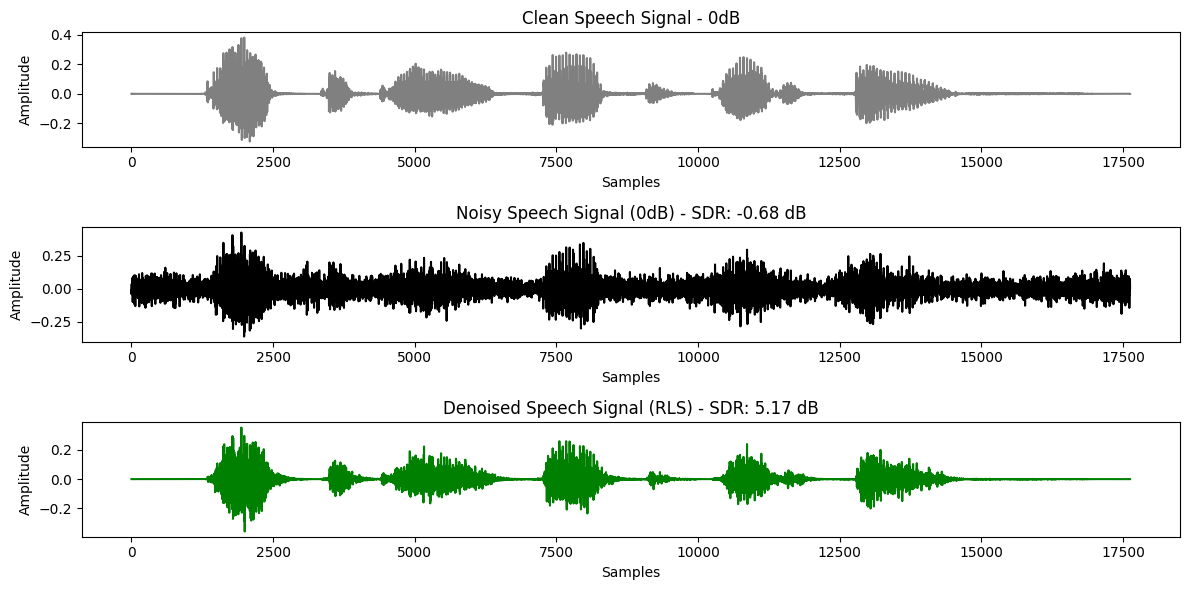

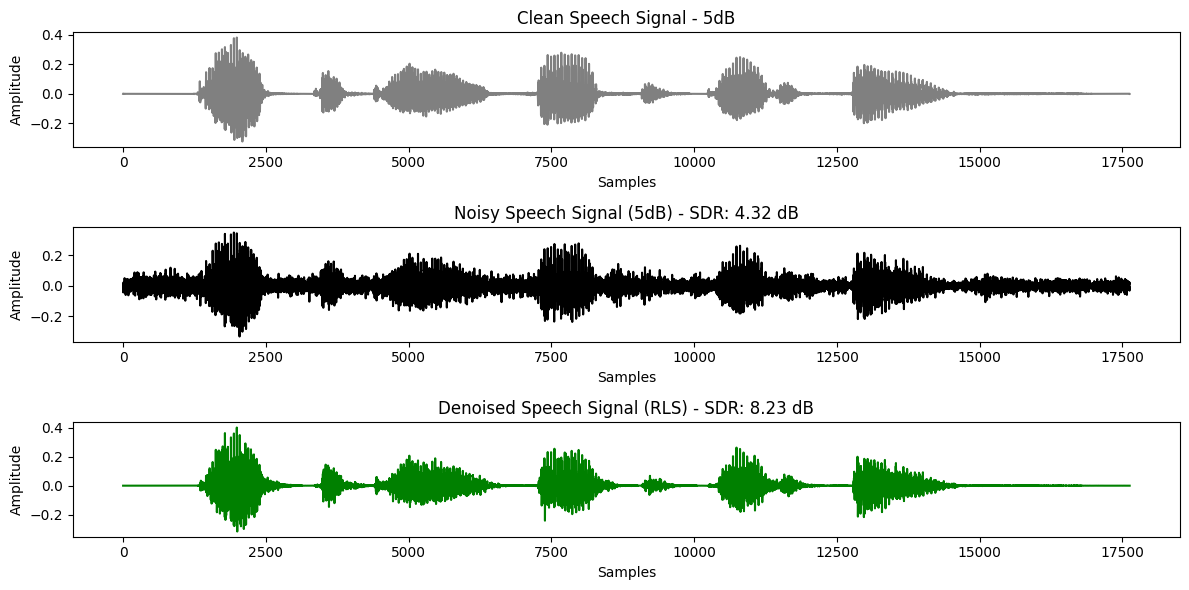

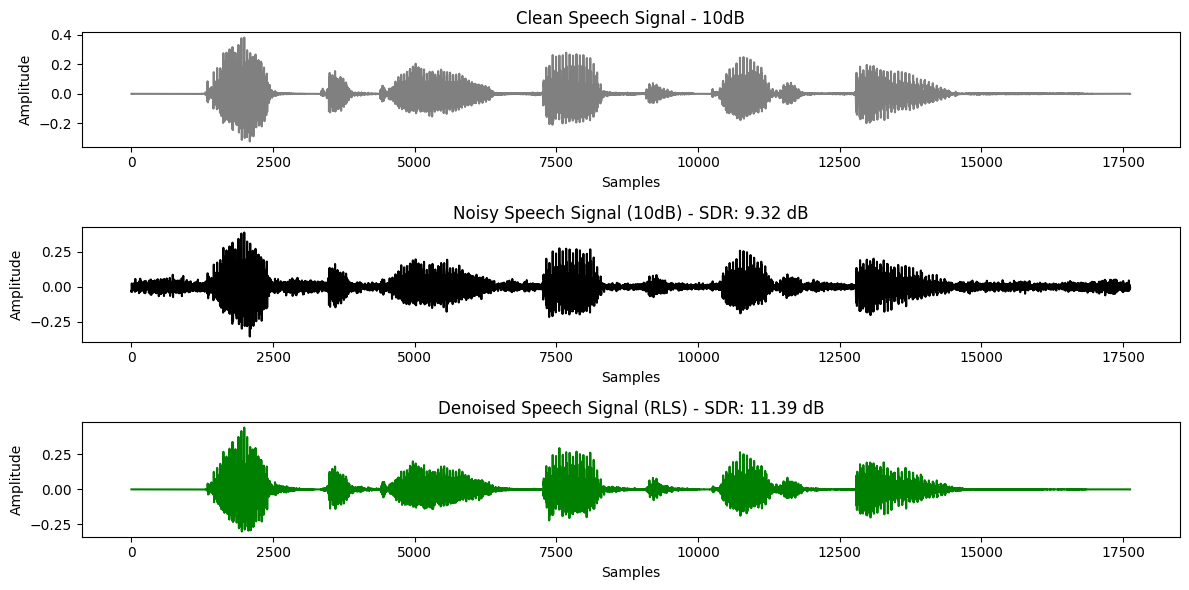

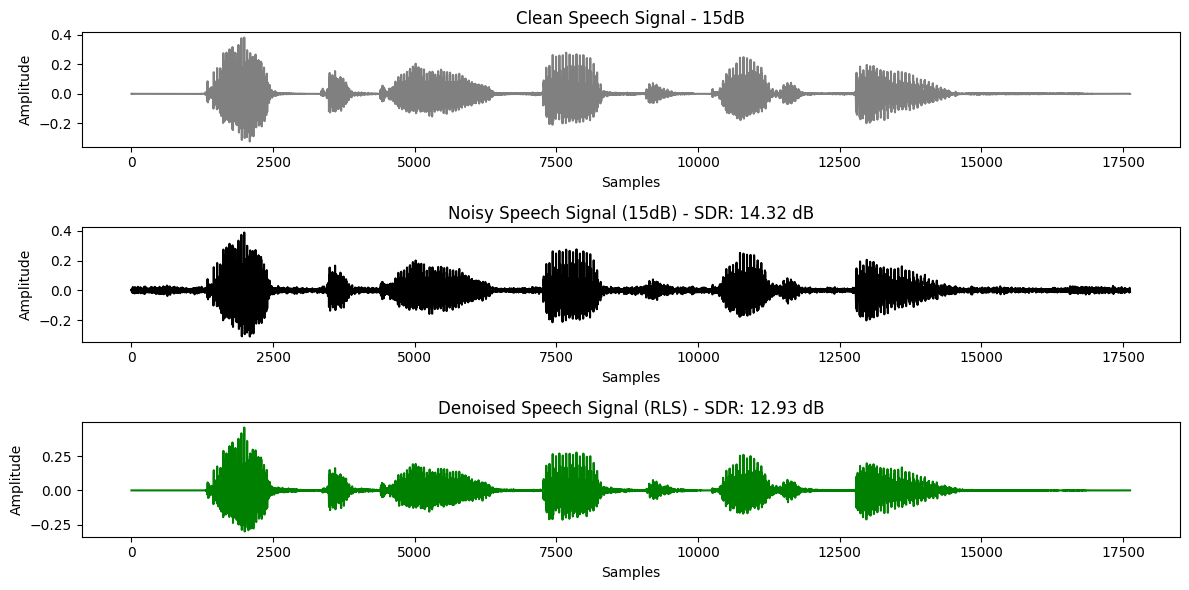

Performance Comparison (SDR values in dB):

0dB -> Clean vs Noisy SDR: -0.68 dB, Clean vs Denoised SDR: 5.17 dB
5dB -> Clean vs Noisy SDR: 4.32 dB, Clean vs Denoised SDR: 8.23 dB
10dB -> Clean vs Noisy SDR: 9.32 dB, Clean vs Denoised SDR: 11.39 dB
15dB -> Clean vs Noisy SDR: 14.32 dB, Clean vs Denoised SDR: 12.93 dB


In [27]:
import numpy as np
import matplotlib.pyplot as plt

def calculate_sdr(clean, estimated):
    num = np.sum(clean ** 2)
    den = np.sum((clean - estimated) ** 2) + 1e-8
    return 10 * np.log10(num / den)

results = {}

snr_levels = {
    "0dB": (noisy0, denoised0),
    "5dB": (noisy5, denoised5),
    "10dB": (noisy10, denoised10),
    "15dB": (noisy15, denoised15)
}

# Loop through each SNR level
for snr, (noisy_sig, denoised_sig) in snr_levels.items():
    sdr_noisy = calculate_sdr(clean, noisy_sig)
    sdr_denoised = calculate_sdr(clean, denoised_sig)

    results[snr] = {"Noisy SDR": sdr_noisy, "Denoised SDR": sdr_denoised}

    # --- Plot signals ---
    plt.figure(figsize=(12, 6))
    plt.subplot(3, 1, 1)
    plt.plot(clean, color='grey')
    plt.title(f"Clean Speech Signal - {snr}")
    plt.xlabel("Samples"); plt.ylabel("Amplitude")

    plt.subplot(3, 1, 2)
    plt.plot(noisy_sig, color='black')
    plt.title(f"Noisy Speech Signal ({snr}) - SDR: {sdr_noisy:.2f} dB")
    plt.xlabel("Samples"); plt.ylabel("Amplitude")

    plt.subplot(3, 1, 3)
    plt.plot(denoised_sig, color='green')
    plt.title(f"Denoised Speech Signal (RLS) - SDR: {sdr_denoised:.2f} dB")
    plt.xlabel("Samples"); plt.ylabel("Amplitude")

    plt.tight_layout()
    plt.show()

# --- Print SDR comparison ---
print("Performance Comparison (SDR values in dB):\n")
for snr, vals in results.items():
    print(f"{snr} -> Clean vs Noisy SDR: {vals['Noisy SDR']:.2f} dB, "
          f"Clean vs Denoised SDR: {vals['Denoised SDR']:.2f} dB")


In [20]:
from IPython.display import Audio

print("Clean Speech:")
Audio(clean, rate=fs_clean)

Clean Speech:


In [21]:
print("Noisy Speech (0dB):")
display(Audio(noisy0, rate=fs_noisy0))

Noisy Speech (0dB):


In [22]:
print("Denoised Speech (0dB):")
display(Audio(denoised0, rate=fs_noisy0))

Denoised Speech (0dB):


In [23]:
noisy0.shape[0]/fs_noisy0

2.203375